In [82]:
# global var set
import transformers

# model info, change as needed
# model_checkpoint = "roberta-base"
model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
batch_size = 16
num_epochs = 16

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
# fileTag = "clean-phase-v1"                # clean +   phase  + combine
# fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
# fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

fileTag
model_checkpoint

'distilbert-base-uncased-finetuned-sst-2-english'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [54]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [55]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//3], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3 : trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//3 else (1 if x < trainDatasetOriginal.shape[0]//3*2 else 2) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//3], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3 : testDatasetOriginal.shape[0]//3*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3*2], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//3 else (1 if x < testDatasetOriginal.shape[0]//3*2 else 2) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [56]:
trainDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,['joy'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",His friend Doug had taunted him for having a l...,After takeoff Jane started to calm down.,They gathered their clothes and shoes and went...,2
1,['frustrated'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","John grew complacent though, and he stopped pr...",Brian got lost between rides.,Brandon tried everything but he couldn't solve...,2
2,['glad'],"{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",After mulling it over the owner decided not to...,Joe and Jane were two candidates for a job.,"He went home and his mom saw his knees, but he...",0
3,['excited'],"{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...",The little girl pointed at Biscuit!,She ended up with five bluegill!,The girls screamed.,2
4,['relieved'],"{'joy': 3, 'trust': 3, 'fear': 2, 'surprise': ...","At the store, they choose a king sized pillow ...",The woman braided her hair.,Eventually the power turned back on and she go...,2
...,...,...,...,...,...,...
53113,['positive'],"{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...",Jordan's mom is happy to see her little girl g...,The doll sold for $50.,The price was too high and he quit.,0
53114,['Startled'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",She pulled her owner around the corner.,Andrew got his revenge in Halloween and scared...,He sang along to the song.,1
53115,['desperate'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He felt something brush his leg.,He tacked it to every telephone pole around hi...,One day he finally took advice from his dad.,2
53116,"['concerned', 'upset']","{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...","After a while, the kid caught every ball.",Cayla wanted her hair cut.,Mimi realized she had contracted the e coli ba...,2


In [57]:
testDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"[""frustrated""]","{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",Lillian went to school that day with a headache.,His family has tried several therapies without...,Allie was babysitting a four year old.,1
1,"[""accomplished""]","{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...","Back as his table, a woman winked at him, thin...",He smothered it with whip cream and it tasted ...,And performed adequately in his class.,2
2,"[""happy""]","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...","Afterward, Sandy's parents said she had been v...",Jim no longer has a driver's license.,"Mia took a cab home, and was angry at her daug...",0
3,"[""welcoming""]","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",I went to fun parties.,Gage wanted to go camping very badly.,He was getting pushed into the lockers everyday.,0
4,"[""content""]","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",Heather gives her niece anything she asks for ...,At first she thought she wouldn't like it but ...,His parents talked it over and agreed to give ...,1
...,...,...,...,...,...,...
51886,"[""none""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","After starting it up, John began to mow his lawn.",He kept getting raises year after year.,"However, this time, the teacher punished her h...",1
51887,"[""proud""]","{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",I cheered wildly.,"When he found out he got an A, he thanked Mike...",Karen wore a grizzly bear necklace.,0
51888,"[""interested""]","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",When it opened she went with her best friend.,Jan regretted wearing the sweater since she ha...,Rex uses a few online resources and also gets ...,2
51889,"[""accomplished"", ""worried about the future""]","{'joy': 3, 'trust': 2, 'fear': 3, 'surprise': ...",Evan realized that he could see his classmate'...,John was now sober for a year.,I was front squatting in the gym.,1


# load dataset

In [83]:
from datasets import load_dataset, load_metric

In [84]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/3Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/3Select-{fileTag}-test.csv'})

Using custom data configuration default-751f6fbb88f1239d


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-751f6fbb88f1239d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [85]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 53234
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 51891
    })
})

In [86]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': '["angry"]',
 'plutchik': '["anger:3"]',
 'selection0': 'At one time most major cities ran PCC trolleys.',
 'selection1': 'And his boss found Facebook messages he wrote.',
 'selection2': 'She went up to the counter and ordered a cone.',
 'label': 1}

In [87]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"\nGround truth: option {['A', 'B', 'C'][example['label']]}")

In [88]:
show_one(dataset["train"][1])

Context: ["Great"]
  A - They had a great time going to the movies.
  B - Luckily she had her phone and she used the GPS to get back on track.
  C - They greatly enjoyed their night out.

Ground truth: option A


# Preprocessing Data

In [89]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

loading file https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
loading file https://huggingface.co/distilbert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer_config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\81e970e5e6ec68be12da0f8f3b2f2469c78d579282299a2ea65b4b7441719107.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f
loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f

In [90]:
selectionList = ["selection0", "selection1", "selection2"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*3 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+3] for i in range(0, len(v), 3)] for k, v in tokenized_examples.items()}

In [91]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 3 [30, 29, 23]


In [92]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(3) ]

['[CLS] The following sentences contain emotions : " contented " [SEP] After the new music came on, Tammy got on the dance floor to show off. [SEP]',
 '[CLS] The following sentences contain emotions : " contented " [SEP] There were many more chores he did but the tractor was what he loved. [SEP]',
 '[CLS] The following sentences contain emotions : " contented " [SEP] Danny wasn\'t able to book another band. [SEP]',
 '[CLS] The following sentences contain emotions : " Great " [SEP] They had a great time going to the movies. [SEP]',
 '[CLS] The following sentences contain emotions : " Great " [SEP] Luckily she had her phone and she used the GPS to get back on track. [SEP]',
 '[CLS] The following sentences contain emotions : " Great " [SEP] They greatly enjoyed their night out. [SEP]',
 '[CLS] The following sentences contain emotions : " Happy they made Alex happy " [SEP] Alex was happy to have a dog of her very own. [SEP]',
 '[CLS] The following sentences contain emotions : " Happy they 

In [93]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/54 [00:00<?, ?ba/s]

  0%|          | 0/52 [00:00<?, ?ba/s]

# Fine-tuning the model

In [94]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
import torch
model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

# model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 28996
}

loading weights file https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin from cache at C:\Users\JAM_0/.cache\huggingface\transformers\9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c8733

In [95]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    # learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [96]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [97]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [98]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(3)]

['[CLS] The following sentences contain emotions : " incapable " [SEP] George sprained his ankle going down the stairs. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : " incapable " [SEP] He made a flyer asking for a strong helper. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : " incapable " [SEP] He hopped off the boat into the crystal clear water. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]']

In [99]:
show_one(dataset["train"][8])

Context: ["incapable "]
  A - George sprained his ankle going down the stairs.
  B - He made a flyer asking for a strong helper.
  C - He hopped off the boat into the crystal clear water.

Ground truth: option B


# Trainer Defined

In [100]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [101]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [102]:
!nvidia-smi

Tue Jun 21 15:46:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   38C    P8    26W / 370W |   8718MiB / 10240MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [103]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.2 GB
Cached:    2.8 GB


In [104]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: emotion, selection2, selection0, Unnamed: 0, plutchik, selection1. If emotion, selection2, selection0, Unnamed: 0, plutchik, selection1 are not expected by `DistilBertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 53234
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 53248


Epoch,Training Loss,Validation Loss,Accuracy
1,1.099300,1.097616,0.373379
2,1.061800,1.029165,0.481914
3,1.004900,0.965626,0.522480
4,0.964800,0.937944,0.540229
5,0.943700,0.920225,0.552331
6,0.933700,0.907452,0.560540
7,0.922800,0.897798,0.567497
8,0.913000,0.891544,0.571775
9,0.900800,0.885866,0.575283
10,0.894000,0.882200,0.578212


Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-1000
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-1000\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-em

TrainOutput(global_step=53248, training_loss=0.9374284102366521, metrics={'train_runtime': 4270.8475, 'train_samples_per_second': 199.432, 'train_steps_per_second': 12.468, 'total_flos': 2.17585852619031e+16, 'train_loss': 0.9374284102366521, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

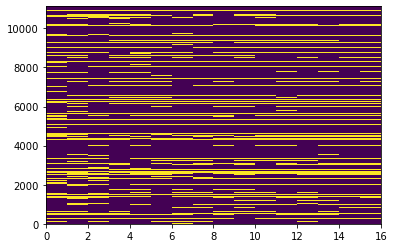

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [105]:
import pandas as pd
if model_checkpoint == 'distilbert-base-uncased-finetuned-sst-2-english':
    model_checkpoint = 'distilbert-base'
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 3Select/TI-{model_checkpoint}-{fileTag}.csv')

In [106]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 3Select/ESI-{model_checkpoint}-{fileTag}.csv')